In [4]:
import tensorflow as tl


In [5]:
print(tl.__version__)

2.19.0


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#assign independent features in x
x=df.iloc[:,3:13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
#assign dependent features in y
y=df.iloc[:,13:]
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [10]:
##Feature engineering

# The pandas.get_dummies() function is used to convert categorical variables into dummy variables,
# also known as indicator variables or one-hot encoding. This transformation is crucial in data preprocessing, 
# especially before feeding data into machine learning models, as most models require numerical input.

In [11]:
geography=pd.get_dummies(x['Geography'],drop_first=True)

In [12]:
geography.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [13]:
gender=pd.get_dummies(x['Gender'],drop_first=True)
gender.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [14]:
x=x.drop(['Geography','Gender'],axis=1)

In [15]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [16]:
x=pd.concat([x,geography,gender],axis=1)

In [17]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [18]:
#splitting the dataset into training set and and test set
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
# #Train-test split is done to check how well a machine learning model will perform on new, unseen data.
# Training data is used to teach the model.
# Testing data is used to check if the model actually learned or just memorized.
# If we only train and test on the same data, the model might do well just because it memorized the answers,
# # not because it truly understands the pattern.
# So, by splitting the data:
# We train on one part (learn patterns),
# and test on the other part (see if it can apply those patterns to new data).




In [21]:
#feature scaling 
#can use min max scalar in cnn
 # Because ANN learns better when all input features are on a similar scale.
# StandardScaler does feature scaling ✅
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
# fit → calculates the mean and standard deviation of the training data
# transform → uses those values to scale the data
# The model should only learn from training data
# If we do fit_transform() on test data too, we're leaking information from the test set into the model
# This would make the model unfairly better, which is not what we want during evaluation
# This avoids data leakage — so the model doesn’t get information from the test set during training — and 
# ensures a fair evaluation on unseen data.

In [22]:
# # Scaling means changing the range of your feature values so they are on a similar scale —
# # without changing the original data's meaning.
# To make all features equally important
# To help the model learn faster and better
# To make gradient-based models (like neural networks) more stable

In [23]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [24]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [25]:
# We calculate mean and standard deviation from the training data using fit(). 
# Then, we apply the same scaling to both training and test data using transform(). 
# We don’t calculate new mean/std on the test set to avoid data leakage and ensure consistent 
# scaling aligned with the model’s training.

In [26]:
x_train.shape

(8000, 11)

In [27]:
#Creating ANN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout



In [29]:
# # In TensorFlow, a Sequential model is a container that holds layers of a neural network arranged in a linear stack. 
# It automatically handles:
# Forward propagation: Data flows through the layers from input to output.
# Backward propagation: During training, gradients are calculated and weights are updated using optimizers.

In [30]:
# Dense layers create the neurons for the input layer, hidden layers, and output layer.
# The first Dense layer (with input_shape) acts as the input layer.
# Additional Dense layers form the hidden layers.
# The last Dense layer is the output layer, with activation based on the task (e.g. softmax, sigmoid, or linear).
# So, Dense layers are responsible for building the full neural network structure.

In [31]:
#we an use activation functions like relu in hidden layer and output layers too

In [32]:
#overfitting means for training data my accuracy goes high but for test accuray goes down


In [33]:
# # A Dropout layer in TensorFlow/Keras is used to reduce overfitting during training by randomly turning off (dropping) 
# # some neurons in a layer at each training step.

# # How it works:
# During training, Dropout randomly sets a fraction of the input units (neurons) to 0.
# This forces the network to not rely too heavily on any one neuron.
# As a result, the model becomes more robust and generalizes better to new (unseen) data.

In [34]:
##lets initialize the ANN
classifier=Sequential()


In [35]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu'))


In [38]:
#addin the first hidden layer
classifier.add(Dense(units=8,activation='relu'))
classifier.add(Dropout(0.2))

In [39]:
#adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [40]:
##adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))


In [41]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
#to use the own learning rate do 
#import tensorflow
#opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01) and put it in optimizer='opt'

In [43]:
# # #early stopping 
# # During training, the model’s performance is monitored on a validation set after each epoch.
# # A chosen metric (like validation loss or validation accuracy) is observed.
# # If the metric does not improve for a set number of consecutive epochs (called patience), training stops early.
# # The model weights are often restored to those from the epoch with the best observed performance.

# ##Benefits
# Avoids overfitting: Stops training before the model starts to memorize training data noise.
# Saves computational resources and time: No need to train for unnecessarily many epochs.
# Automates epoch selection: Removes the need to guess the perfect number of training epochs beforehand.



In [44]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.002,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [45]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7448 - loss: 0.6185 - val_accuracy: 0.7955 - val_loss: 0.4840
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7814 - loss: 0.5107 - val_accuracy: 0.7955 - val_loss: 0.4489
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7967 - loss: 0.4778 - val_accuracy: 0.7959 - val_loss: 0.4381
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8048 - loss: 0.4591 - val_accuracy: 0.7959 - val_loss: 0.4316
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8083 - loss: 0.4424 - val_accuracy: 0.7982 - val_loss: 0.4272
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8020 - loss: 0.4521 - val_accuracy: 0.8073 - val_loss: 0.4189
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8099 - loss: 0.4355 - val_accuracy: 0.8088 - val_loss: 0.4102
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8080 - loss: 0.4325 

In [50]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

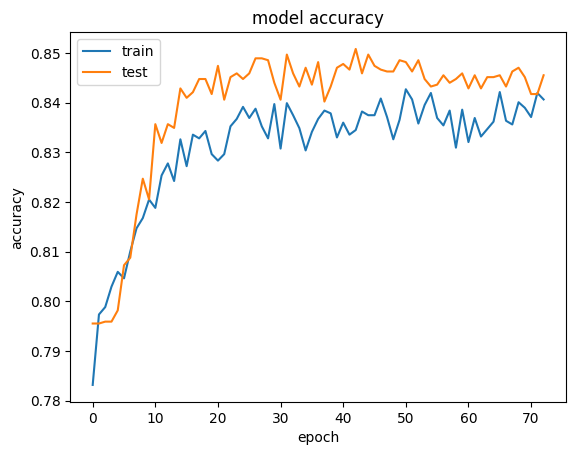

In [51]:
#summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [52]:
#Making the Prediction and evaluating the model 

In [53]:
#predicting the Test set results
y_pred=classifier.predict(x_test)
y_pred=(y_pred >=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [54]:
#make the confusion matrix 
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred)
cn

array([[1522,   73],
       [ 206,  199]])

In [55]:
#calculate the accuracy 
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [56]:
score

0.8605

In [57]:
##get the weights
classifier.get_weights()

[array([[ 4.63140979e-02,  1.44475605e-02,  4.86523658e-03,
          1.23474762e-01,  1.07172489e-01,  4.99705151e-02,
          1.69744287e-02,  5.93828550e-03,  1.35757402e-02,
         -1.00643598e-01,  2.09655724e-02],
        [-1.04161835e+00, -2.72227585e-01, -5.69109805e-02,
         -3.25050689e-02, -8.77593994e-01, -3.47694486e-01,
          3.93194735e-01, -2.29493231e-01, -9.55363095e-01,
         -2.55788155e-02, -3.28902118e-02],
        [-1.25684530e-01, -1.18765384e-02, -1.10758893e-01,
         -3.34450334e-01, -1.45675465e-01,  2.60951787e-01,
         -1.20718464e-01,  1.64094582e-01, -8.36463552e-03,
         -4.83031869e-02,  1.87752634e-01],
        [ 4.97482866e-01, -8.27345178e-02,  6.33466601e-01,
          4.18413311e-01, -3.13361138e-01, -2.76259691e-01,
          4.45513636e-01,  4.08043295e-01, -4.69737828e-01,
         -8.55444133e-01,  3.63550298e-02],
        [-2.02217475e-01,  1.01332629e+00,  1.20339680e+00,
         -2.12992176e-01,  1.93639249e-02,  